# Task 3.2

**Classification/Regression**
- *Write a Python program to build and test a model for each dataset mentioned above. For this task, you should use the dataset obtained after completing Task 3.1.*
- *Markdown Question: Is Linear Regression a good model to use for the star dataset? Justify your answer.*

## Table of Contents
- [Introduction](#Introduction)
- [Imports](#Imports)
- [Star Dataset](#Star-Dataset)
    - [Train and evaluate an SVM classifier using the holdout method](#Train-and-evaluate-an-SVM-classifier-using-the-holdout-method)
    - [Train and evaluate an SVM classifier using cross-validation](#Train-and-evaluate-an-SVM-classifier-using-cross-validation)
    - [Perform SVM classifier hyperparameter tuning](#Perform-SVM-classifier-hyperparameter-tuning)
    - [Evaluate the tuned SVM classifier](#Evaluate-the-tuned-SVM-classifier)
- [GWP Dataset](#GWP-Dataset)
    - [Train and evaluate a Random Forest regressor using the holdout method](#Train-and-evaluate-a-Random-Forest-regressor-using-the-holdout-method)
    - [Train and evaluate a Random Forest regressor using cross-validation](#Train-and-evaluate-a-Random-Forest-regressor-using-cross-validation)
    - [Perform Random Forest regressor hyperparameter tuning](#Perform-Random-Forest-regressor-hyperparameter-tuning)
    - [Evaluate the tuned Random Forest regressor](#Evaluate-the-tuned-Random-Forest-regressor)
- [Markdown Question](#Markdown-Question)

## Introduction <a class="anchor" id="Introduction"></a>

This notebook was completed by B921400 on 11/05/2023 and is intended to fulfill and exceed the requirements of task 3.2 of the 22COC131 coursework. The first major section of the notebook is centered around training and evaluating a model on the star dataset. Within this section, first a Support Vector Machine Model was trained and evaluated using the holdout method, then cross-validation was applied to get a better understanding of the model's performance. Model evaluation was performed by computing the accuracy, precision, recall and F1-score metrics for the SVM classifier, as well as generating a confusion matrix, a precision-recall curve and a ROC curve which were analysed. Then, as an extension to the requirements of the task, hyperparameter tuning was performed on the SVM classifier using a cross-validation grid search. A model was then created using what were determined to be the best hyperparameters for the dataset and evaluated against the initial SVM classifier.

The second major section of the notebook surrounds the creation and evaluation of a model for the GWP dataset. For this dataset, a Random Forest Regressor was trained to predict the actual productivity of garment workers, and evaluated using the R<sup>2</sup>, mean absolute error and root mean squared error metrics, as well as a scatter plot of the predicted vs actual values. Similar to the first section, hyperparameter tuning was also performed on the Random Forest Regressor using a grid search in order to improve the model's performance and reduce its deviation. Finally, the tuned model was evaluated in comparison to the initial Random Forest Regressor using the evaluation metrics stated previously. This notebook is concluded with the response to the markdown question.

## Imports <a class="anchor" id="Imports"></a>

In [10]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor

from preprocessing_utils import preprocess_star_dataset, preprocess_gwp_dataset
from evaluation_utils import evaluate_classification_model, evaluate_regression_model, perform_cross_validation
from model_utils import create_train_test_split, tune_hyperparameters

## Star Dataset <a class="anchor" id="Star-Dataset"></a>

First, let's use the `preprocess_star_dataset` function created in task 3.1 to load and preprocess the star dataset

In [11]:
star_X, star_Y = preprocess_star_dataset('star_assessment.csv')
class_labels = ['GALAXY', 'QSO', 'STAR']

#### Train and evaluate an SVM classifier using the holdout method <a class="anchor" id="Train-and-evaluate-an-SVM-classifier-using-the-holdout-method"></a>

The type of model that will be used for the star dataset is a Support Vector Machine, which are a type of supervised learning model that can be used for classification and regression tasks. In this case, an SVM classifier will be used to classify the star dataset into the three classes of stars, galaxies and quasars. As it is a supervised learning model, first let's split the dataset into training and testing sets using stratified sampling to ensure that the classes are balanced in both sets.

In [12]:
star_x_train, star_x_test, star_y_train, star_y_test = create_train_test_split(star_X, star_Y, stratify=True)

Then we can create and train an SVM classifier using the training set, then evaluate it by using the testing set to generate metrics such as accuracy and F1-score, and graphs including a confusion matrix, precision-recall curve and a ROC curve.

Accuracy: 0.9646674064124278
Precision: 0.9586665844179838
Recall: 0.9367806884176715
F1-score: 0.9462649996050625


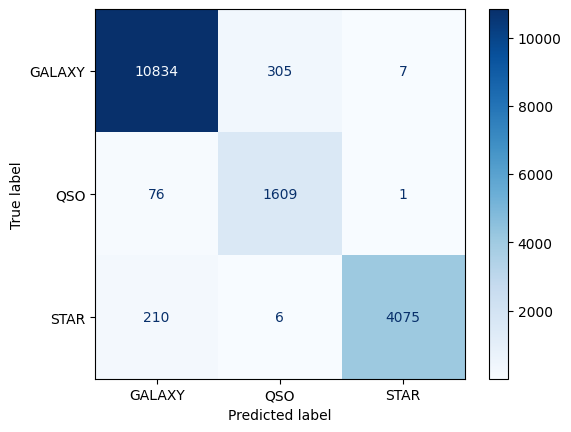

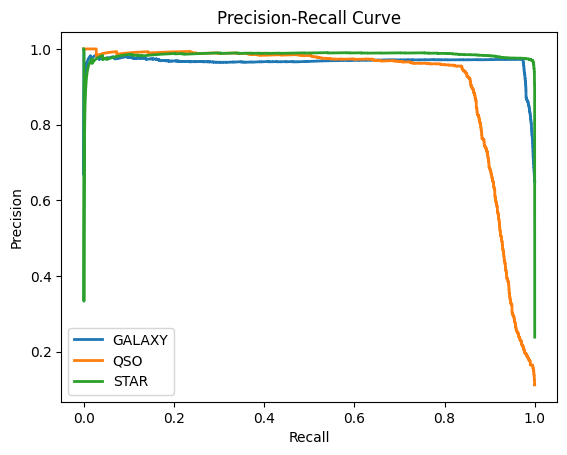

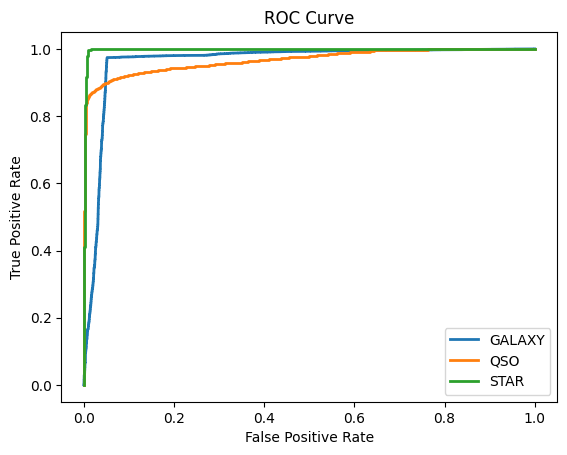

In [13]:
svc_holdout = SVC()
svc_holdout.fit(star_x_train, star_y_train)
evaluate_classification_model(svc_holdout, star_x_test, star_y_test, class_labels)

The accuracy score calculated shows that the model is performing well, as it predicts the correct label for 96.5% of the samples in the test set. Additionally, since the precision and recall are balanced, this shows that the model doesn't predict to many false positives or false negatives. The ROC curve shows that model struggles to correctly classify quasars more than stars or galaxies, as the area under the curve for quasars is lower than the other two classes. This is also reflected in the precision-recall curve, as the area under this curve for quasars is also lower than the other two classes.

#### Train and evaluate an SVM classifier using cross-validation <a class="anchor" id="Train-and-evaluate-an-SVM-classifier-using-cross-validation"></a>

Next, we can create an SVM classifier and evaluate it using cross-validation to get a better estimate of the model's performance, and calculate the mean accuracy and standard deviation of the model's performance across the folds.

In [14]:
_ = perform_cross_validation(SVC(), star_X, star_Y)

Mean Accuracy: 0.9647950903529996
Standard Deviation: 0.001465985325714977


The high mean accuracy and low standard deviation of the model's performance across the folds shows that the model is performing well. However, there is still room for improvement with an SVM classifier, thus the next step is to perform hyperparameter tuning to improve the model's performance.

#### Perform SVM classifier hyperparameter tuning <a class="anchor" id="Perform-SVM-classifier-hyperparameter-tuning"></a>

To tune the hyperparameters of a machine learning model, a common approach is to use the grid search method. This involves creating a grid of possible values for each hyperparameter, then training and evaluating a model for each combination of hyperparameters. The best performing model is then selected, and the hyperparameters used to create it are returned. In this task, SciKit-Learn's `GridSearchCV` class will be used to perform grid search as it is a simple and effective way to perform hyperparameter tuning while also performing cross-validation.

In [18]:
svc_rbf_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
}

best_svc_params = tune_hyperparameters(SVC(kernel='rbf'), svc_rbf_grid, star_X, star_Y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters:
kernel = rbf
C = 1000
gamma = 0.1


#### Evaluate the tuned SVM classifier <a class="anchor" id="Evaluate-the-tuned-SVM-classifier"></a>

With these parameters, we can now train another SVM classifier and evaluate it using cross-validation, so that an effective comparison can be made with the previous model.

In [15]:
svc_tuned = SVC(**best_svc_params)
_ = perform_cross_validation(svc_tuned, star_X, star_Y)

Mean Accuracy: 0.9725392085013876
Standard Deviation: 0.001162952279931272


This model shows a solid improvement in accuracy over the previous model, given how high the accuracy of the previous model was. The mean accuracy of this model is 0.973 with a standard deviation of 0.001.

Accuracy: 0.9724931378847165
Precision: 0.9640206539689421
Recall: 0.9501451107666402
F1-score: 0.956546535608469


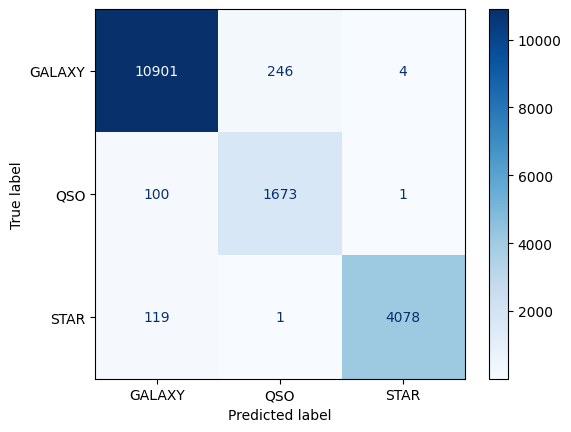

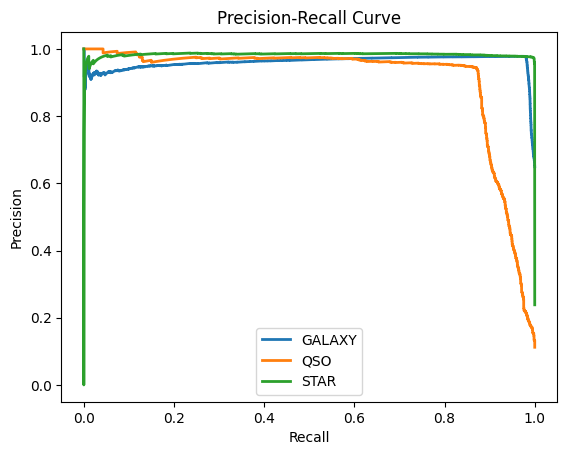

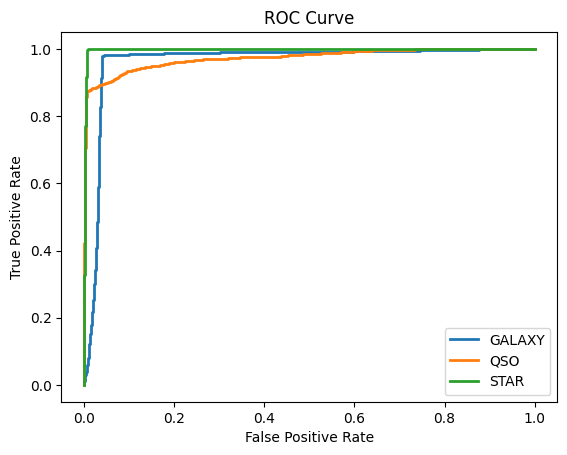

In [17]:
svc_tuned.fit(star_x_train, star_y_train)
evaluate_classification_model(svc_tuned, star_x_test, star_y_test, class_labels)

When comparing this confusion matrix to the one produced by the initial SVM classifier, it is clear that the model has improved by the fact that the number of correctly predicted labels has increased. Additionally, the area under the ROC and precision-recall curves has increased for each of the three classes, which shows that the model is performing better at classifying each of the three classes, although the change in the curves for stars is minimal showing that potentially some outliers may still exist in the dataset.

## GWP Dataset <a class="anchor" id="GWP-Dataset"></a>

Similar to the star dataset, let's use a function created in task 3.1 to preprocess the GWP dataset.

In [2]:
gwp_X, gwp_Y = preprocess_gwp_dataset('gwp_assessment.csv')

#### Train and evaluate a Random Forest regressor using the holdout method <a class="anchor" id="Train-and-evaluate-a-Random-Forest-regressor-using-the-holdout-method"></a>

The model that will be used for the GWP dataset is a Random Forest Regressor, which is a type of supervised learning model that can be used for regression tasks (Random Forest Classifiers can be used for classification). According to the SciKit-Learn [documentation](https://scikit-learn.org/stable/modules/ensemble.html#random-forests), the principle behind a Random Forest is that it is an ensemble of decision trees, with each tree created using a random subset of the training data and its features. The predictions of each tree are averaged to generate the final prediction of the model for each sample. Again, let's first split the dataset into training and testing sets.

In [3]:
gwp_x_train, gwp_x_test, gwp_y_train, gwp_y_test = create_train_test_split(gwp_X, gwp_Y)

Then we can train a Random Forest Regressor using the training set and evaluate it using the test set. The metrics that will be used to evaluate the model are the R<sup>2</sup> score, mean absolute error, and mean squared error. Additionally, a plot of the predicted GWP values against the actual GWP values will be created to visualise the model's performance.

R^2 Score: 0.4576827104693223
Mean Absolute Error: 0.07235953581164607
Root Mean Squared Error: 0.1202590669562098


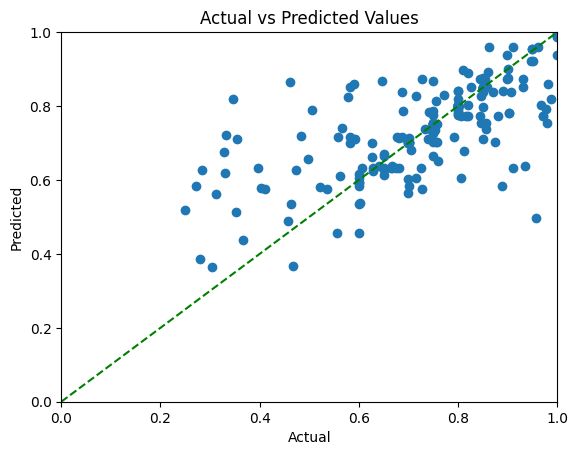

In [5]:
rf_holdout = RandomForestRegressor()
rf_holdout.fit(gwp_x_train, gwp_y_train)
evaluate_regression_model(rf_holdout, gwp_x_test, gwp_y_test)

The R<sup>2</sup> score of the Random Forest Classifier model is 0.458 which is acceptable, although it does indicate that the model may struggle to accurately predict the actual productivity of samples in the testing set. However, due to the nature of the dataset attempting to predict the actual productivity of humans, a relatively low R<sup>2</sup> score is expected. The mean absolute error and root mean squared error are 0.072 and 0.120 respectively, which reflect this as they are fairly low values given the actual values range from approximately 0.3 to 1.0 in the testing set. The plot of the predicted GWP values against the actual GWP values also shows that the model predicts some samples accurately (given how close many are to the line y=x), but others are predicted poorly.

#### Train and evaluate a Random Forest regressor using cross-validation <a class="anchor" id="Train-and-evaluate-a-Random-Forest-regressor-using-cross-validation"></a>

Next, we can train a Random Forest Regressor using cross-validation to get a better estimate of the model's performance, and calculate the mean RMSE score and standard deviation of the model's performance across the folds.

In [8]:
_ = perform_cross_validation(RandomForestRegressor(), gwp_X, gwp_Y)

Mean RMSE: 0.13639082614127207
Standard Deviation: 0.02293228961046981


The mean RMSE score of a standard Random Forest Regressor model on the GWP dataset was found to be 0.136, with a standard deviation of 0.023 across the folds. Whilst not varying massively, the randomness involved with creating the trees in each Random Forest could explain the deviation in performance between, as they are created using a random subset of the training data and features. Alternatively, the relatively small dataset size could mean the model is struggling to learn patterns in the data. Next, we will attempt to reduce the RMSE and its deviation across the folds by tuning the hyperparameters of the model.

#### Perform Random Forest regressor hyperparameter tuning <a class="anchor" id="Perform-Random-Forest-regressor-hyperparameter-tuning"></a>

Similar to with the star dataset, we can perform a full grid search over all the hyperparameters that are worth testing. For a Random Forest Regressor, the most important hyperparameters to be tuned are:
- `n_estimators`: The number of trees in the forest
- `max_depth`: The maximum depth of the tree
- `min_samples_split`: The minimum number of samples required to split an internal node
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node
- `bootstrap`: Whether bootstrap samples are used when building trees

The hyperparameters used in the grid search are selected based upon knowledge gained from reading the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) for the `RandomForestRegressor` class.

In [7]:
rf_param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

best_rf_params = tune_hyperparameters(RandomForestRegressor(), rf_param_grid, gwp_X, gwp_Y)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters:
bootstrap = True
max_depth = 10
min_samples_leaf = 4
min_samples_split = 2
n_estimators = 200


#### Evaluate the tuned Random Forest regressor <a class="anchor" id="Evaluate-the-tuned-Random-Forest-regressor"></a>

Now that the best hyperparameters have been found, we can create another Random Forest Regressor model using these parameters and evaluate it using cross-validation.

In [8]:
rf_tuned = RandomForestRegressor(**best_rf_params)
_ = perform_cross_validation(rf_tuned, gwp_X, gwp_Y)

Mean RMSE: 0.13291670825688645
Standard Deviation: 0.024351705058241607


With the tuned model, a mean RMSE score of 0.133 was achieved which is an improvement over the previous score of 0.136. The standard deviation of the model's performance across the folds remained similar at 0.024. Whilst these improvements are not hugely significant, they do demonstrate that the model's performance can be improved by tuning the hyperparameters.

R^2 Score: 0.4881725780206655
Mean Absolute Error: 0.0712075507167884
Root Mean Squared Error: 0.11682959735621774


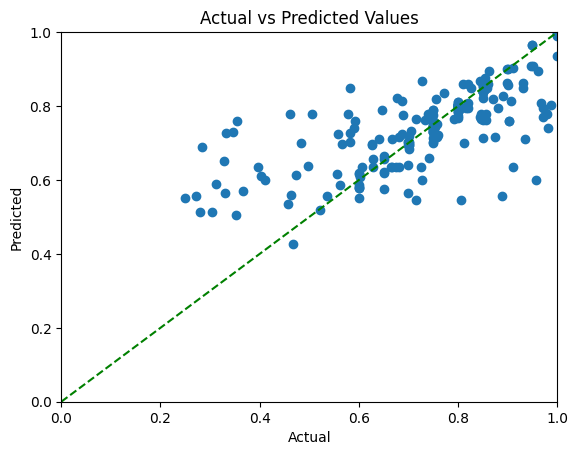

In [9]:
rf_tuned.fit(gwp_x_train, gwp_y_train)
evaluate_regression_model(rf_tuned, gwp_x_test, gwp_y_test)

Evidently, in comparison to the un-tuned model, the tuned Random Forest model clearly achieves a better performance which is reflected in the smaller R<sup>2</sup> mean absolute error and root mean squared error values. The plot of predicted vs actual values also shows that the model is better at predicting the productivity since the points are more tightly grouped around the line y=x.

## Markdown Question <a class="anchor" id="Markdown-Question"></a>

*Is Linear Regression a good model to use for the star dataset? Justify your answer.*

Linear regression models assume a linear relationship between the features and the target variable, which isn't true in the case of many classification problems. In the star dataset, the target variable is categorical, namely having the classes `galaxy`, `qso` and `star`, meaning it is more suited to be a classification task. Therefore, linear regression wouldn't be as suitable a model to use for this dataset as a classification model would, as there may not be a linear relationship between the features and the target. Additionally, using a linear regression model for the star dataset would result in continuous predictions being made that aren't meaningful as they wouldn't fall into any of the three categories, making the predictions harder to interpret. Another reason why they shouldn't be used is that evaluation metrics commonly used for regression models, such as RMSE, are not suitable to be used for classification tasks, which use other metrics, including accuracy and F1-score. Finally, linear regression models can be more sensitive to outliers than many models suited to classification, which may result in it being less accurate than a classification model.